# Importing the Relevant Libraries

In [1]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.utils.validation import check_X_y


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, TargetEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# Loading the Dataset to be used & examining the raw data 

In [2]:
# Load the dataset
file_path = "Spotify Data.csv"
sdata = pd.read_csv(file_path)

# Count missing values in each column
missing_values = sdata.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

# Display the first few rows of the dataset
df_head = sdata.head()
df_info = sdata.info()

df_head, df_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

(                 track_id                 artists  \
 0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       210826     False   
 3  Can't Help Falling In Love          71       20193

# Examining Unique Values in non-numerical columns

In [3]:
# Selecting non-numeric columns
non_numeric_columns = sdata.select_dtypes(exclude=['number', 'bool']).columns

# Count unique values for each non-numeric column
for col in non_numeric_columns:
    unique_count = sdata[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.\n")
    
    # Display top unique values for insight
    print(sdata[col].value_counts().head(10), "\n" + "-"*50 + "\n")


Column 'track_id' has 89741 unique values.

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
7tbzfR8ZvZzJEzy6v0d6el    7
0YLSjVxSb5FT1Bo8Tnxr8j    7
4WJTKbNJQ41zXnb84jSWaj    7
2aaClnypAakdAmLw74JXxB    7
2vU6bm5hVF2idVknGzqyPL    7
Name: count, dtype: int64 
--------------------------------------------------

Column 'artists' has 31437 unique values.

artists
The Beatles          279
George Jones         271
Stevie Wonder        236
Linkin Park          224
Ella Fitzgerald      222
Prateek Kuhad        217
Feid                 202
Chuck Berry          190
HÃ¥kan HellstrÃ¶m    183
OneRepublic          181
Name: count, dtype: int64 
--------------------------------------------------

Column 'album_name' has 46579 unique values.

album_name
Alternative Christmas 2022      195
Feliz CumpleaÃ±os con Perreo    184
Metal                           143
Halloween con perreito          123
Hallowe

# Cleaning the raw data steps

In [4]:
# 1. Standardizing simple text columns, not names (strip spaces, lowercase)
sdata['track_genre'] = sdata['track_genre'].str.strip().str.lower()

#2. Convert popularity to binary labels (1 = Popular, 0 = Not Popular)
sdata["popularity_label"] = (sdata["popularity"] > 80).astype(int)

#3 Handle missing values (drop rows with missing artist, album_name, or track_name)
sdata = sdata.dropna()

#4. Normalize loudness (since it's in negative decibels)
sdata["loudness"] = (sdata["loudness"] - sdata["loudness"].min()) / (sdata["loudness"].max() - sdata["loudness"].min())

#5. Normalize tempo
sdata["tempo"] = (sdata["tempo"] - sdata["tempo"].min()) / (sdata["tempo"].max() - sdata["tempo"].min())

#6. Drop track_id
sdata = sdata.drop(columns=["track_id"])  

#7. Remove duplicates
sdata_clean = sdata.drop_duplicates()


#8. Confirm dataset cleanup
print(sdata_clean.info())
print(sdata_clean.head())
print("Columns in sdata_clean:\n", sdata_clean.columns)



<class 'pandas.core.frame.DataFrame'>
Index: 113422 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113422 non-null  object 
 1   album_name        113422 non-null  object 
 2   track_name        113422 non-null  object 
 3   popularity        113422 non-null  int64  
 4   duration_ms       113422 non-null  int64  
 5   explicit          113422 non-null  bool   
 6   danceability      113422 non-null  float64
 7   energy            113422 non-null  float64
 8   key               113422 non-null  int64  
 9   loudness          113422 non-null  float64
 10  mode              113422 non-null  int64  
 11  speechiness       113422 non-null  float64
 12  acousticness      113422 non-null  float64
 13  instrumentalness  113422 non-null  float64
 14  liveness          113422 non-null  float64
 15  valence           113422 non-null  float64
 16  tempo             113422 

# Ensuring the normalization was successful

In [5]:
# Features to analyze 
features = ["danceability", "energy", "valence", "loudness", "acousticness", "tempo"]

# Finding Min and Max for each feature
high_low_values = {}
for feature in features:
    high_low_values[feature] = {
        "Minimum": sdata_clean[feature].min(),
        "Maximum": sdata_clean[feature].max()
    }

# Convert to DataFrame for better readability
high_low_df = pd.DataFrame(high_low_values)

# Display the results
print(high_low_df)


         danceability  energy  valence  loudness  acousticness  tempo
Minimum         0.000     0.0    0.000       0.0         0.000    0.0
Maximum         0.985     1.0    0.995       1.0         0.996    1.0


# Examine distribution of Target Variable 

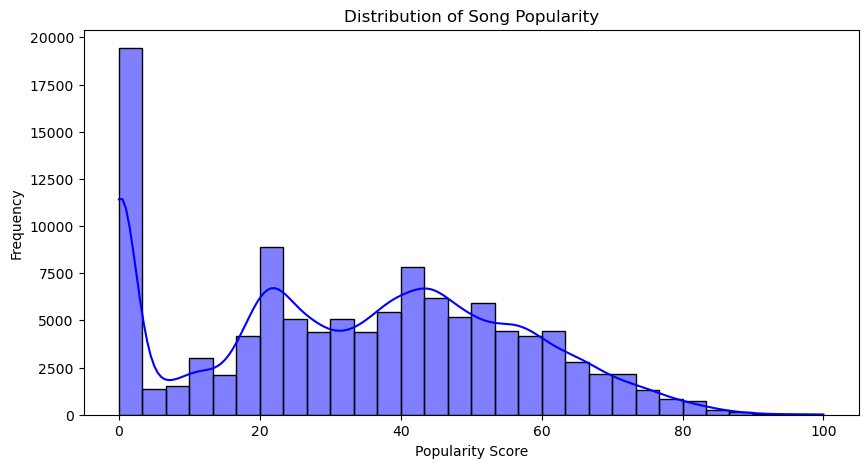

In [6]:
# Plot distribution of popularity scores to show how many are 
plt.figure(figsize=(10, 5))
sns.histplot(sdata_clean["popularity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

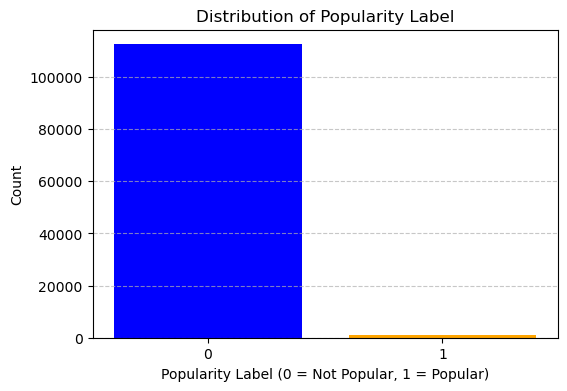

In [7]:
# Since 'popularity_code' is a binary variable (0 or 1)
if 'popularity_label' in sdata_clean.columns:
    # Count occurrences of each category (0 and 1)
    popularity_counts = sdata_clean['popularity_label'].value_counts()

    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(popularity_counts.index.astype(str), popularity_counts.values, color=['blue', 'orange'])
    plt.xlabel("Popularity Label (0 = Not Popular, 1 = Popular)")
    plt.ylabel("Count")
    plt.title("Distribution of Popularity Label")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'popularity_label' not found in the dataset. Please ensure it exists.")


# Balance popularity_label using SMOTE 

In [8]:
# Ensure a copy of the dataset to avoid SettingWithCopyWarning
sdata_clean = sdata_clean.copy()

# Drop non-numeric and unnecessary columns
sdata_clean.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre", "explicit"], inplace=True, errors='ignore')

# Convert popularity into numeric binary values
sdata_clean.loc[:, "popularity_label"] = (sdata_clean["popularity"] > 80).astype(int)  # Use `.loc` to prevent warnings

# Define Features (X) and Target (y)
X = sdata_clean.drop(columns=["popularity_label", "popularity"])  # Drop target variable and raw popularity
y = sdata_clean["popularity_label"]

# Ensure all columns in X are numeric
print(X.dtypes)  # Check that all remaining features are numerical

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42, sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
sdata_balanced = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["popularity_label"])], 
    axis=1
)

# Check new class balance
sdata_balanced.info()
print("Balanced Class Distribution:")
print(sdata_balanced["popularity_label"].value_counts())


duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224938 entries, 0 to 224937
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       224938 non-null  int64  
 1   danceability      224938 non-null  float64
 2   energy            224938 non-null  float64
 3   key               224938 non-null  int64  
 4   loudness          224938 non-null  float64
 5   mode              224938 non-null  int64  
 6   speechiness       224938 non-null  float64
 7   acousticness      224938 non-null  float64
 8   instrumentalness  224938 n

C:\Users\MIran\anaconda3-2\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


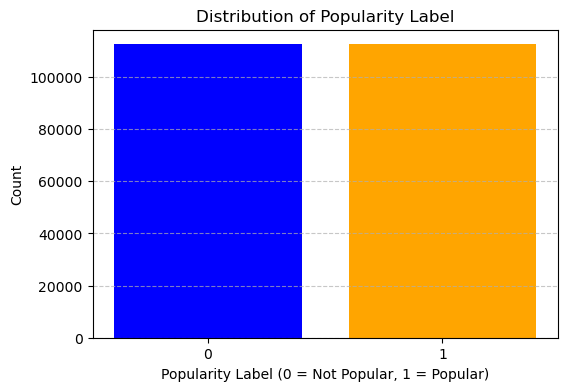

In [9]:
# Re-examine the distribution after balancing
if 'popularity_label' in sdata_balanced.columns:
    # Count occurrences of each category (0 and 1)
    popularity_counts = sdata_balanced['popularity_label'].value_counts()

    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(popularity_counts.index.astype(str), popularity_counts.values, color=['blue', 'orange'])
    plt.xlabel("Popularity Label (0 = Not Popular, 1 = Popular)")
    plt.ylabel("Count")
    plt.title("Distribution of Popularity Label")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'popularity_label' not found in the dataset. Please ensure it exists.")


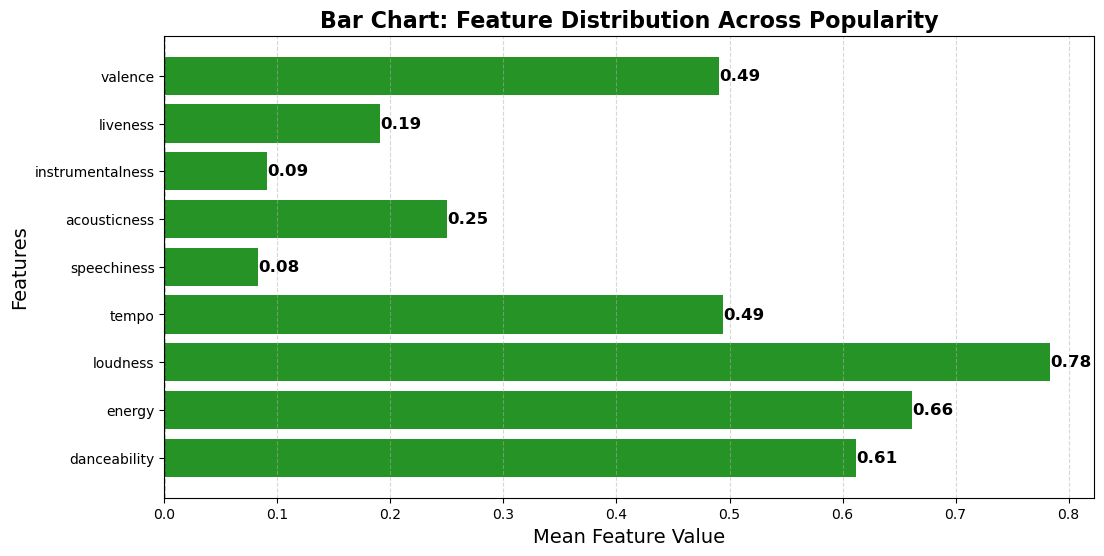

In [10]:
# Selecting numerical features for visualization
numerical_features = ['danceability', 'energy', 'loudness', 'tempo', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence']

# Compute the average of each feature across popularity labels (without additional normalization)
diverging_data = sdata_balanced.groupby('popularity_label')[numerical_features].mean().mean()

# Define color mapping (green for positive, red for negative)
colors = ['red' if value < 0 else 'green' for value in diverging_data]

# Create a diverging bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(diverging_data.index, diverging_data.values, color=colors, alpha=0.85)

# Add annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left' if bar.get_width() > 0 else 'right',
             fontsize=12, fontweight='bold')

# Styling
plt.axvline(0, color='black', linestyle='--', linewidth=1)  
plt.xlabel("Mean Feature Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Bar Chart: Feature Distribution Across Popularity", fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

# Compute numerical statistics and print the stats as a chart after Balancing


In [11]:
# Compute numerical statistics and print the stats as a chart
numerical_stats = sdata_clean[numerical_features].describe().round(2)

numerical_stats

,danceability,energy,loudness,tempo,speechiness,acousticness,instrumentalness,liveness,valence
count,113422.00,113422.00,113422.00,113422.00,113422.00,113422.00,113422.00,113422.00,113422.00
mean,0.57,0.64,0.76,0.50,0.08,0.31,0.16,0.21,0.47
std,0.17,0.25,0.09,0.12,0.11,0.33,0.31,0.19,0.26
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.46,0.47,0.73,0.41,0.04,0.02,0.00,0.10,0.26
50%,0.58,0.68,0.79,0.50,0.05,0.17,0.00,0.13,0.46
75%,0.70,0.85,0.82,0.58,0.08,0.60,0.05,0.27,0.68
max,0.98,1.00,1.00,1.00,0.96,1.00,1.00,1.00,1.00


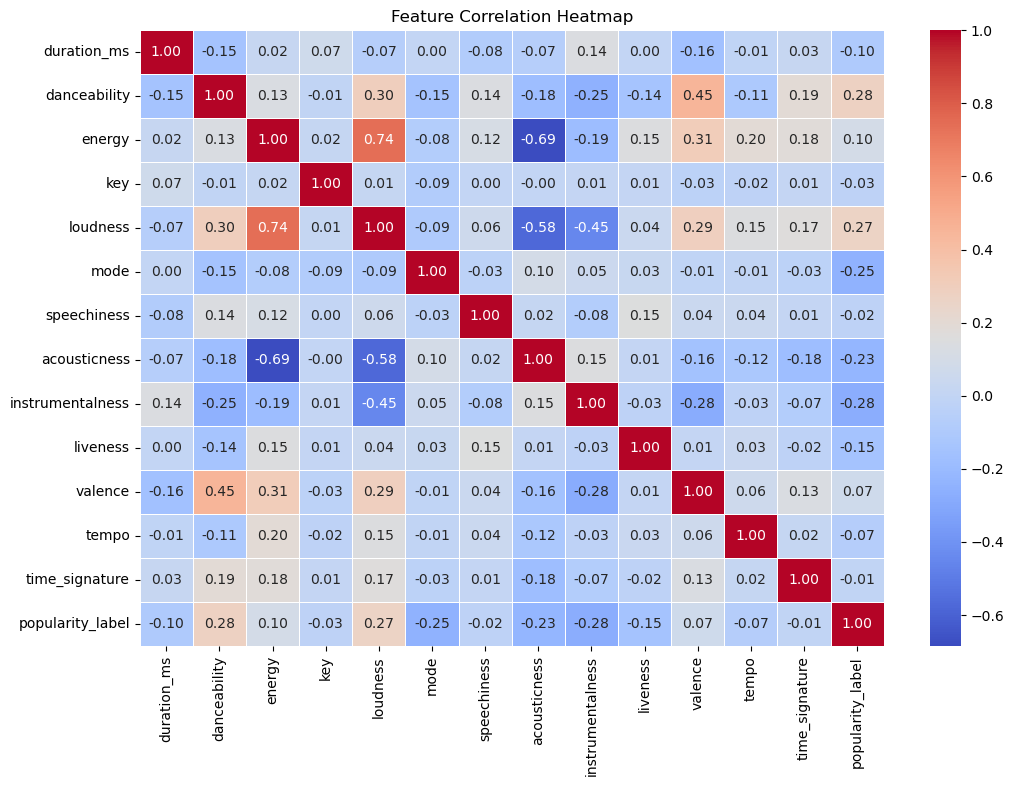

In [28]:
# Drop non-numeric columns
numeric_data = sdata_balanced.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

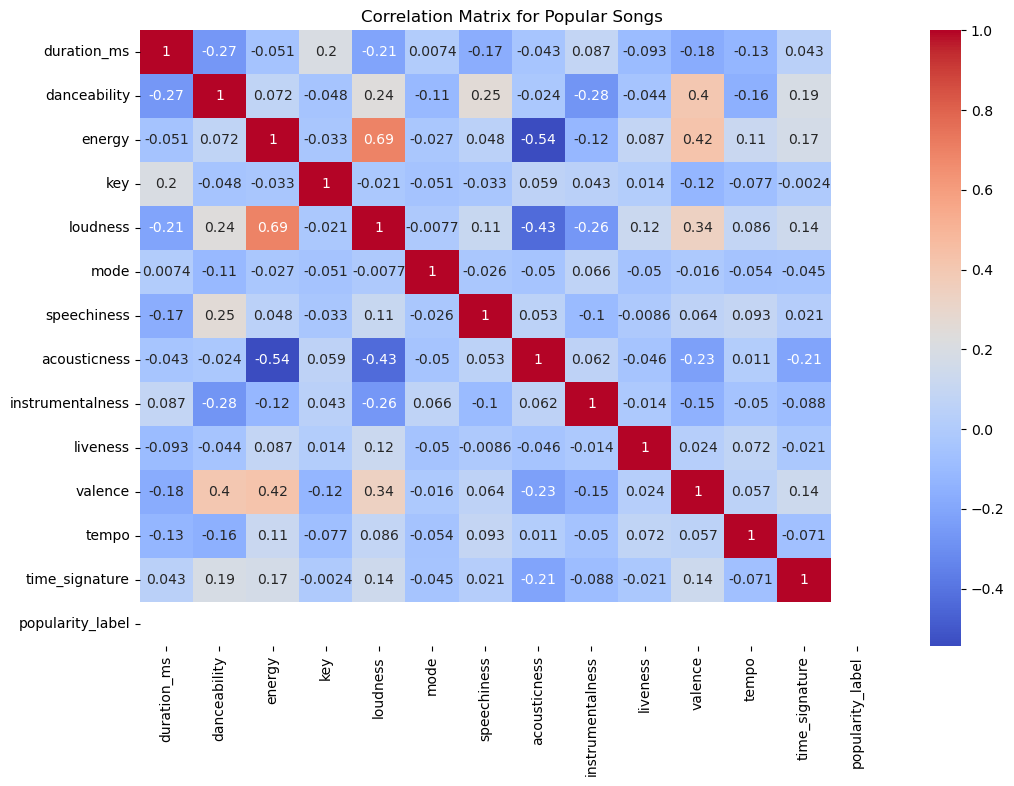

Features shape: (112469, 13)
Target shape: (112469,)


In [12]:
# Filter the dataset to include only popular songs (popularity_label = 1)
popular_songs = sdata_balanced[sdata_balanced['popularity_label'] == 1]

# Calculate the correlation matrix
correlation_matrix = popular_songs.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Popular Songs')
plt.show()

# Prepare data for feature importance calculation
X = popular_songs.drop(columns=['popularity_label'])
y = popular_songs['popularity_label']

# Check if the features and target variable are correctly prepared
print("Features shape:", X.shape)
print("Target shape:", y.shape)


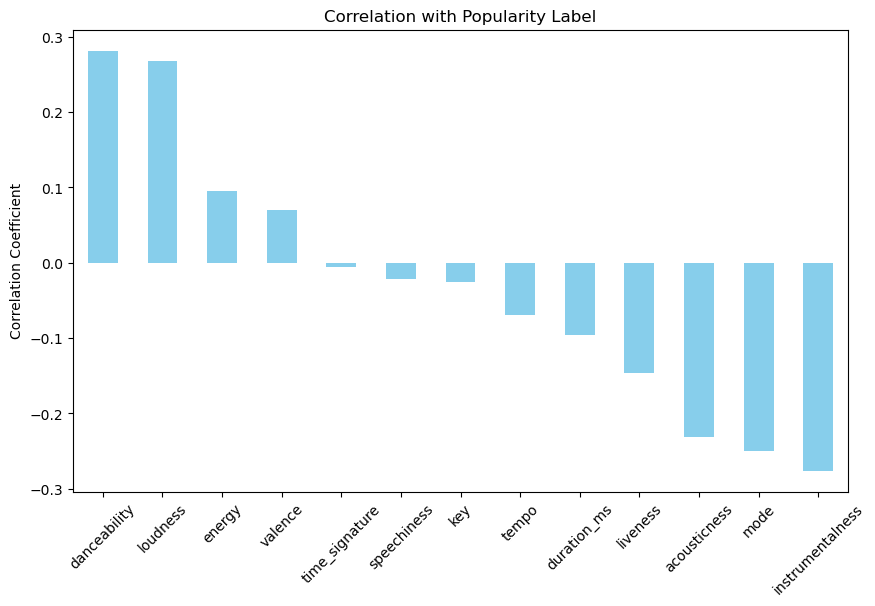

In [29]:
# Calculate correlation coefficients with popularity_label
correlation_with_popularity = sdata_balanced.corr()['popularity_label'].drop('popularity_label')

# Plot the correlation bar chart
plt.figure(figsize=(10, 6))
correlation_with_popularity.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation with Popularity Label')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

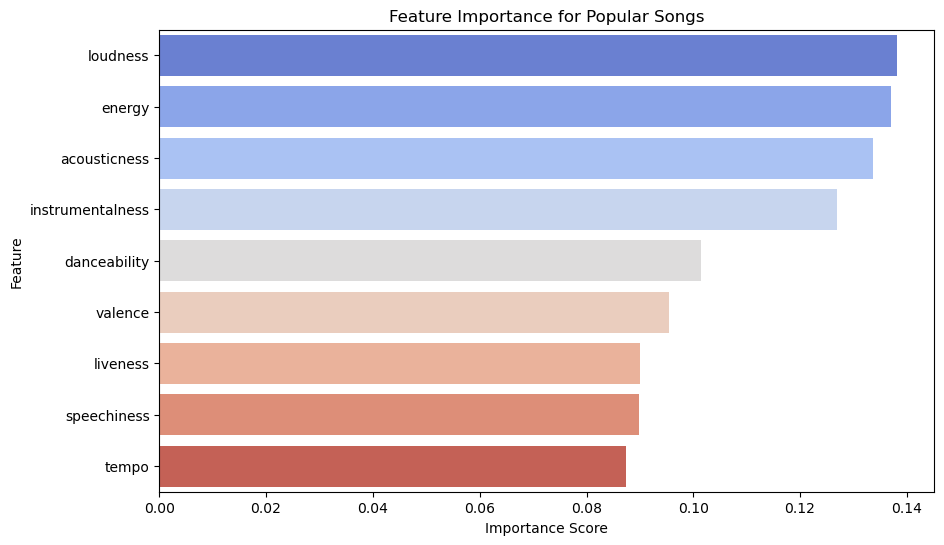

In [30]:
# Ensure numerical_features is a list of valid column names
if not isinstance(numerical_features, list):
    raise TypeError("numerical_features should be a list of column names.")

# Extract selected numerical columns from DataFrame
X_popular = sdata_balanced[numerical_features]  
X_popular = X_popular.select_dtypes(include=[np.number])  # Keep only numeric columns
X_popular = X_popular.fillna(X_popular.mean())  # Handle missing values
y_popular = sdata_balanced['popularity_label']

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_popular, y_popular)

# Feature importance DataFrame
importance_df = pd.DataFrame({'Feature': X_popular.columns, 'Importance': rf_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', dodge=False, legend=False, palette='coolwarm')
plt.title('Feature Importance for Popular Songs')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [15]:
# Convert popularity_label to int
sdata_balanced["popularity_label"] = sdata_balanced["popularity_label"].astype(int)

# Create separate datasets for popularity_label = 1 and popularity_label = 0
popularity_label_Y = sdata_balanced[sdata_balanced["popularity_label"] == 1]
popularity_label_N = sdata_balanced[sdata_balanced["popularity_label"] == 0]

# Print dataset sizes to verify
print(f"🔹 Popular Songs (popularity_label = 1): {popularity_label_Y.shape[0]} rows")
print(f"🔹 Unpopular Songs (popularity_label = 0): {popularity_label_N.shape[0]} rows")

🔹 Popular Songs (popularity_label = 1): 112469 rows
🔹 Unpopular Songs (popularity_label = 0): 112469 rows


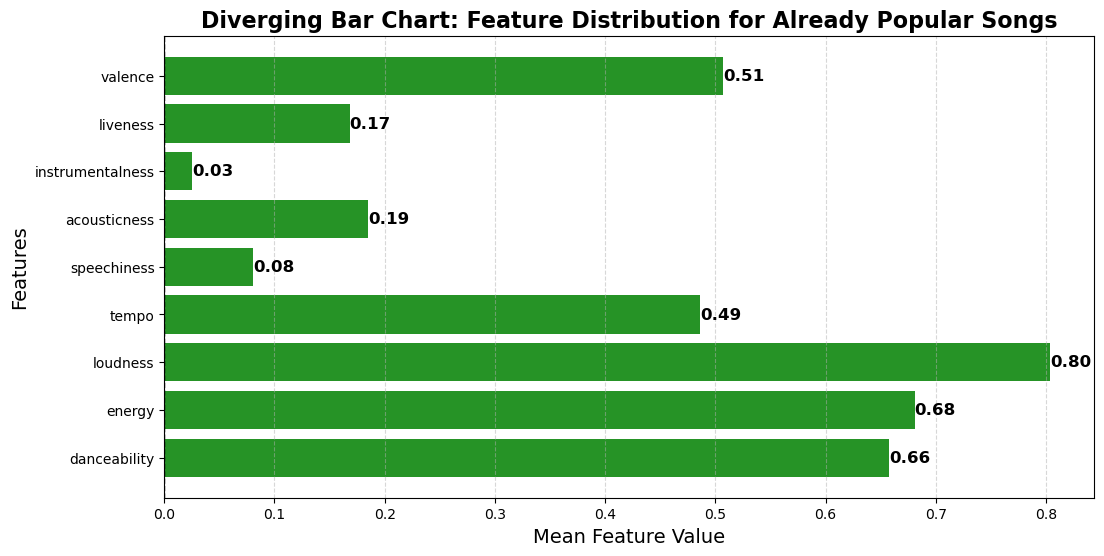

In [16]:
# Compute the mean of each feature for popular songs
diverging_data_Y = popularity_label_Y[numerical_features].mean()

# Define color mapping (green for positive, red for negative)
colors = ['red' if value < 0 else 'green' for value in diverging_data_Y]

# Create a diverging bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(diverging_data_Y.index, diverging_data_Y.values, color=colors, alpha=0.85)

# Add annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left' if bar.get_width() > 0 else 'right',
             fontsize=12, fontweight='bold')

# Styling
plt.axvline(0, color='black', linestyle='--', linewidth=1)  
plt.xlabel("Mean Feature Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Diverging Bar Chart: Feature Distribution for Already Popular Songs", fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 112469 entries, 4 to 224937
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       112469 non-null  int64  
 1   danceability      112469 non-null  float64
 2   energy            112469 non-null  float64
 3   key               112469 non-null  int64  
 4   loudness          112469 non-null  float64
 5   mode              112469 non-null  int64  
 6   speechiness       112469 non-null  float64
 7   acousticness      112469 non-null  float64
 8   instrumentalness  112469 non-null  float64
 9   liveness          112469 non-null  float64
 10  valence           112469 non-null  float64
 11  tempo             112469 non-null  float64
 12  time_signature    112469 non-null  int64  
 13  popularity_label  112469 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 12.4 MB
None


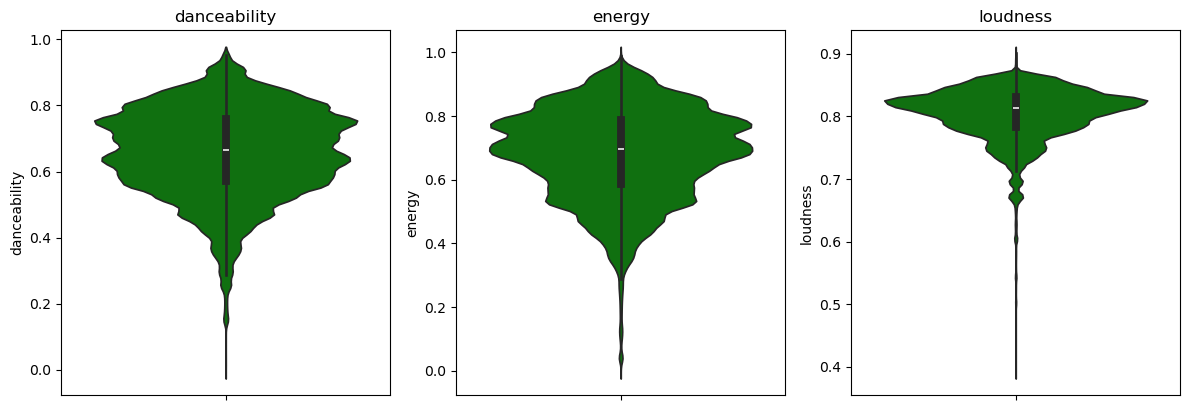

In [17]:
# Load dataset (assuming 'sdata_balanced' exists from previous processing)
popular_songs = sdata_balanced[sdata_balanced['popularity_label'] == 1]

print(popular_songs.info())

# Create a sub-set of key features with high correlation with popularity_label == 1
key_feat = popular_songs[['danceability', 'energy', 'loudness']]

# 1. Feature Distribution - Violin Plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_feat.columns):  # Iterating over selected key features
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=popular_songs[feature], color='green')
    plt.title(feature)
plt.tight_layout()
plt.show()



# Splitting of the Data for Test/Training Sets

Logistic Regression Accuracy: 0.6676

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65     22494
           1       0.65      0.72      0.68     22494

    accuracy                           0.67     44988
   macro avg       0.67      0.67      0.67     44988
weighted avg       0.67      0.67      0.67     44988



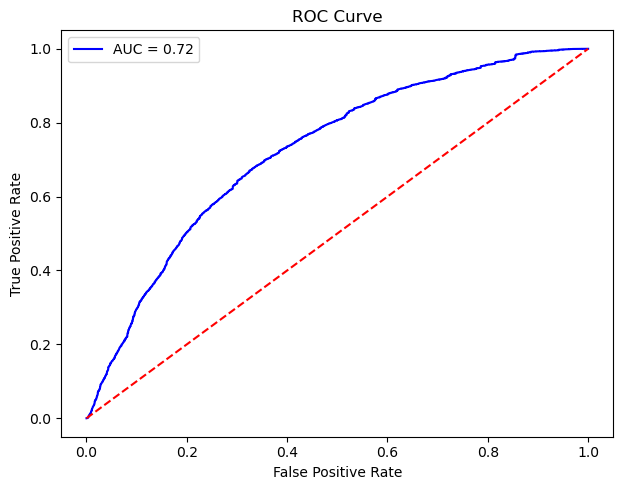

In [18]:
# Ensure key_feat is a valid list of column names
if isinstance(key_feat, pd.DataFrame):
    key_feat = list(key_feat.columns)  # Convert DataFrame to column list
elif not isinstance(key_feat, list):
    raise TypeError("key_feat should be a list of column names.")

# Extract numerical features from dataset
X = sdata_balanced[key_feat]
y = sdata_balanced['popularity_label']

# Handle missing values
X = X.fillna(X.mean())

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
Log_y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Performance metrics
Log_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {Log_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, Log_y_proba)
roc_auc = auc(fpr, tpr)

# --- PLOTS ---
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.7117
              precision    recall  f1-score   support

           0       0.83      0.53      0.65     22494
           1       0.66      0.89      0.76     22494

    accuracy                           0.71     44988
   macro avg       0.74      0.71      0.70     44988
weighted avg       0.74      0.71      0.70     44988


Random Forest Accuracy: 0.9303
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     22494
           1       0.92      0.94      0.93     22494

    accuracy                           0.93     44988
   macro avg       0.93      0.93      0.93     44988
weighted avg       0.93      0.93      0.93     44988


Gradient Boosting Accuracy: 0.7534
              precision    recall  f1-score   support

           0       0.78      0.71      0.74     22494
           1       0.73      0.80      0.76     22494

    accuracy                           0.75     44988
   macro avg       0.76     

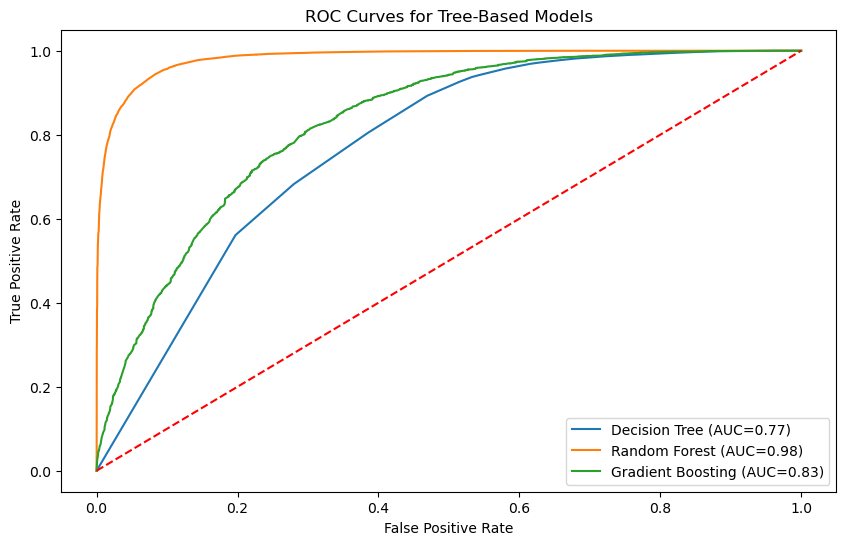

In [19]:
# Define tree-based models
Tree_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Store results for comparison
Tree_model_results = {}
plt.figure(figsize=(10, 6))

for name, model in Tree_models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
    
    # Accuracy and classification report
    Tree_accuracy = accuracy_score(y_test, y_pred)
    Tree_model_results[name] = {
        "Accuracy": Tree_accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "y_proba": y_proba
    }
    print(f"\n{name} Accuracy: {Tree_accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

# Finalize ROC Curve Plot
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tree-Based Models")
plt.legend()
plt.show()



LDA Accuracy: 0.6638
              precision    recall  f1-score   support

           0       0.69      0.59      0.64     22494
           1       0.64      0.74      0.69     22494

    accuracy                           0.66     44988
   macro avg       0.67      0.66      0.66     44988
weighted avg       0.67      0.66      0.66     44988


QDA Accuracy: 0.6917
              precision    recall  f1-score   support

           0       0.79      0.53      0.63     22494
           1       0.64      0.86      0.74     22494

    accuracy                           0.69     44988
   macro avg       0.72      0.69      0.68     44988
weighted avg       0.72      0.69      0.68     44988



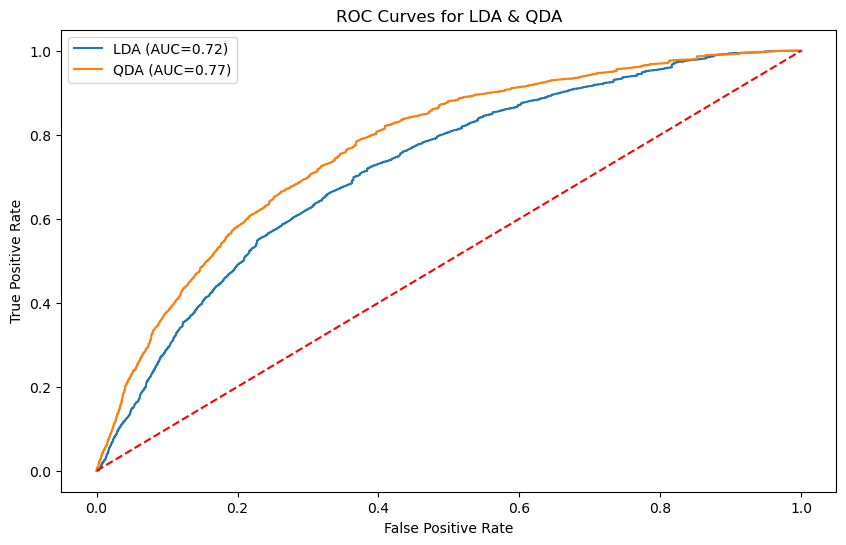

In [20]:
LDA_models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Store results for comparison
LDA_model_results = {}
plt.figure(figsize=(10, 6))

for name, model in LDA_models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
        
        # Accuracy and classification report
        LDA_accuracy = accuracy_score(y_test, y_pred)
        LDA_model_results[name] = {
        "Accuracy": LDA_accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "y_proba": y_proba
    }
       
        print(f"\n{name} Accuracy: {LDA_accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")
    
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")

# Finalize ROC Curve Plot
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for LDA & QDA")
plt.legend()
plt.show()


Neural Network Accuracy: 0.7544

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.73     22494
           1       0.72      0.84      0.77     22494

    accuracy                           0.75     44988
   macro avg       0.76      0.75      0.75     44988
weighted avg       0.76      0.75      0.75     44988



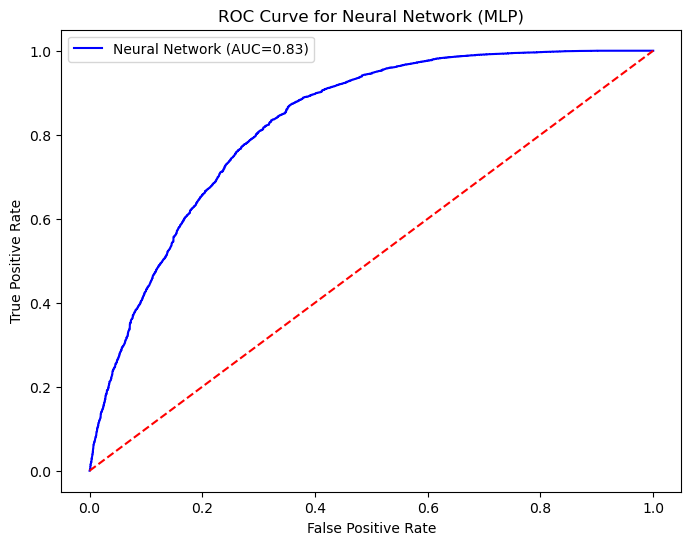

In [21]:
# Train a Neural Network (MLPClassifier)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_scaled)
MLP_y_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Performance metrics
MLP_accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {MLP_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, MLP_y_proba)
roc_auc = auc(fpr, tpr)

# --- PLOT ROC CURVE ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Neural Network (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network (MLP)")
plt.legend()
plt.show()

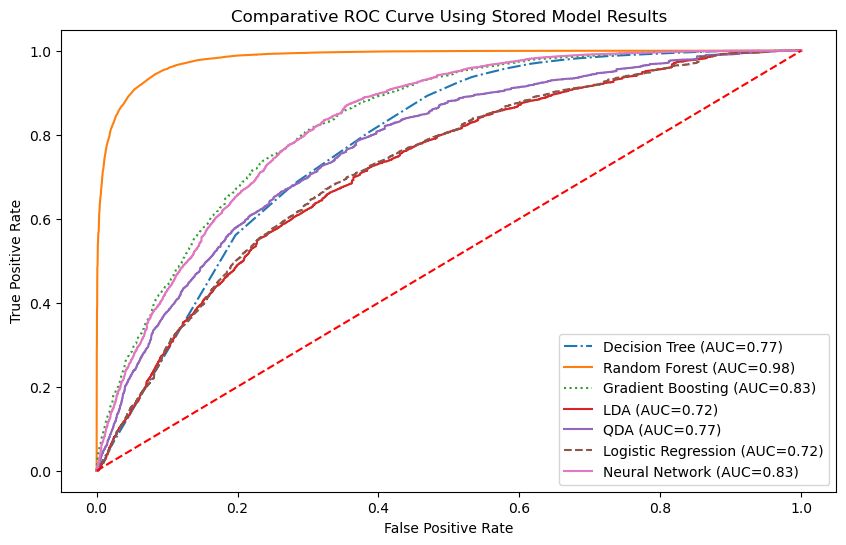

In [22]:
# Extract stored probability predictions correctly
fpr_tree, tpr_tree, _ = roc_curve(y_test, Tree_model_results["Decision Tree"]["y_proba"])
auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test, Tree_model_results["Random Forest"]["y_proba"])
auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, Tree_model_results["Gradient Boosting"]["y_proba"])
auc_gb = auc(fpr_gb, tpr_gb)

fpr_lda, tpr_lda, _ = roc_curve(y_test, LDA_model_results["LDA"]["y_proba"])
auc_lda = auc(fpr_lda, tpr_lda)

fpr_qda, tpr_qda, _ = roc_curve(y_test, LDA_model_results["QDA"]["y_proba"])
auc_qda = auc(fpr_qda, tpr_qda)

fpr_log, tpr_log, _ = roc_curve(y_test, Log_y_proba)  # Logistic Regression
auc_log = auc(fpr_log, tpr_log)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, MLP_y_proba)  # Neural Network
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot All ROC Curves Together
plt.figure(figsize=(10, 6))

plt.plot(fpr_tree, tpr_tree, linestyle='-.', label=f'Decision Tree (AUC={auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, linestyle='-', label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, linestyle=':', label=f'Gradient Boosting (AUC={auc_gb:.2f})')
plt.plot(fpr_lda, tpr_lda, linestyle='-', label=f'LDA (AUC={auc_lda:.2f})')
plt.plot(fpr_qda, tpr_qda, linestyle='-', label=f'QDA (AUC={auc_qda:.2f})')
plt.plot(fpr_log, tpr_log, linestyle='--', label=f'Logistic Regression (AUC={auc_log:.2f})')
plt.plot(fpr_mlp, tpr_mlp, linestyle='-', label=f'Neural Network (AUC={auc_mlp:.2f})')

# Add Reference Line (Random Guessing Baseline)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Labels & Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparative ROC Curve Using Stored Model Results")
plt.legend()
plt.show()



Final Random Forest Model Accuracy: 0.9301

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     22494
           1       0.92      0.94      0.93     22494

    accuracy                           0.93     44988
   macro avg       0.93      0.93      0.93     44988
weighted avg       0.93      0.93      0.93     44988



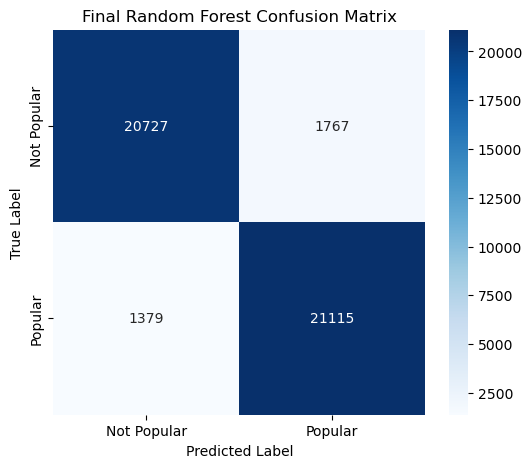

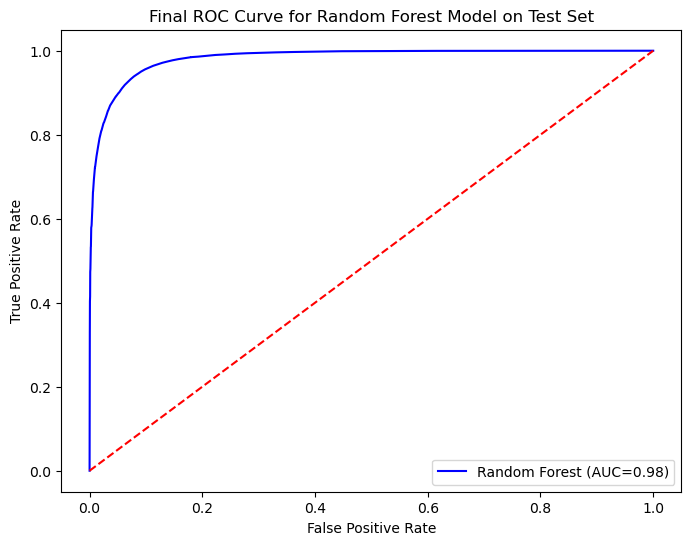

In [23]:
# Re-train the model to ensure consistency
rf_model.fit(X_train, y_train)

# Ensure Test Data Matches Train Data
X_test = X_test.astype(X_train.dtypes)  # Fix data type mismatch
X_test = X_test.reset_index(drop=True)  # Fix index mismatches

# Final Predictions on Test Set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# erformance Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Random Forest Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Final Random Forest Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final ROC Curve for Random Forest Model on Test Set")
plt.legend()
plt.show()
